#  Decision tree on Iris data



In [1]:
# importing important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [2]:
#loading dataset
iris=load_iris()
X=iris.data
Y=iris.target
print(X.shape)
print(Y.shape)

(150, 4)
(150,)


In [3]:
X=pd.DataFrame(X)
X.head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
# splitting data in train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=.2,stratify=Y)

In [5]:
#printing shapes of splitted data
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(120, 4) (120,)
(30, 4) (30,)


### modelling

In [6]:
# modelling
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

### checking performance using accuracy_score and f1_score

In [11]:
# we will check performance of decision tree on iris data using f1 score and accuracy_score
from sklearn.metrics import accuracy_score
y_pred=dt.predict(X_test)
print('accuracy_score : ',accuracy_score(y_test,y_pred))

accuracy_score :  0.9666666666666667


In [12]:
from  sklearn.metrics import f1_score
print('f1-score : ',f1_score(y_test,y_pred,average='weighted'))

f1-score :  0.9665831244778613


### plotting heatmap of confusion matrix

In [13]:
# plotting Confusion matrix for test data
from sklearn.metrics import confusion_matrix
conf_mat=confusion_matrix(y_test,y_pred)
print(conf_mat)


[[10  0  0]
 [ 0 10  0]
 [ 0  1  9]]


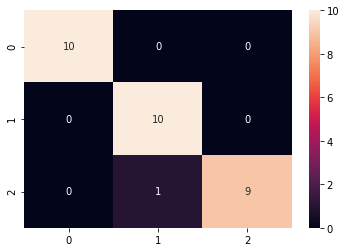

In [14]:
# plotting heatmap of confusion matrix
import seaborn as sns
sns.heatmap(conf_mat,annot=True)

### Vizualizing decision tree

[Text(362.7, 647.79, 'petal width (cm) <= 0.8\ngini = 0.667\nsamples = 120\nvalue = [40, 40, 40]'),
 Text(306.9, 530.01, 'gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]'),
 Text(418.5, 530.01, 'petal width (cm) <= 1.75\ngini = 0.5\nsamples = 80\nvalue = [0, 40, 40]'),
 Text(223.2, 412.22999999999996, 'petal length (cm) <= 4.95\ngini = 0.169\nsamples = 43\nvalue = [0, 39, 4]'),
 Text(111.6, 294.45, 'petal width (cm) <= 1.65\ngini = 0.051\nsamples = 38\nvalue = [0, 37, 1]'),
 Text(55.8, 176.66999999999996, 'gini = 0.0\nsamples = 37\nvalue = [0, 37, 0]'),
 Text(167.39999999999998, 176.66999999999996, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(334.79999999999995, 294.45, 'petal width (cm) <= 1.55\ngini = 0.48\nsamples = 5\nvalue = [0, 2, 3]'),
 Text(279.0, 176.66999999999996, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(390.59999999999997, 176.66999999999996, 'sepal length (cm) <= 6.95\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(334.79999999999995, 58.88999999999

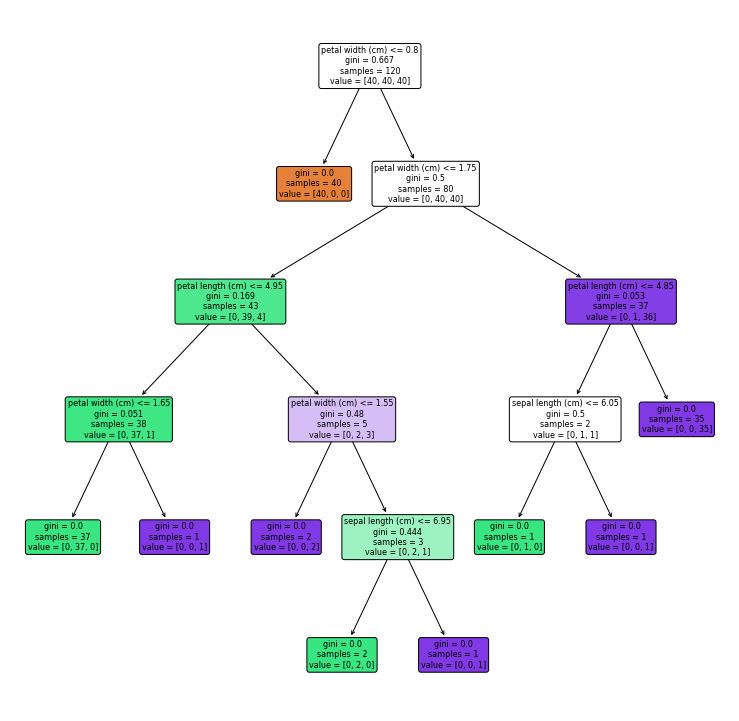

In [15]:
# vizualizing decision tree
from sklearn.tree import plot_tree
plt.figure(figsize=(13,13))
plot_tree(dt,feature_names=iris.feature_names,  
                filled=True, rounded=True)